In [88]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

plt.style.use(['science', 'notebook', 'grid'])

In [89]:
##Obsevações : As unidades dos dados de frequencia (f) são Hz (hertz) e as unidades para todos os valores de Potenical elétrico em cada componente são V (volt)

#circuito RC (Passa-alta) - 12.7.3

f = np.array([50.16, 101.12, 150.23, 200.3, 256.0, 303.9, 349.3, 402.9, 456.5, 502.8, 557.1, 600.2, 649.2, 754.1, 851.4, 957.6, 1057, 1202, 1395, 1598, 1805, 2005, 2502, 2971, 4068, 5015, 8000, 12610, 15035, 17610, 20011])
f_err = np.array([0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 10, 1])

V_0 = np.array([22.34, 22.29, 22.26, 22.19, 22.16, 22.09, 22.04, 21.99, 21.96, 21.88, 21.86, 21.81, 21.63, 21.51, 21.51, 21.46, 21.41, 21.38, 21.36, 21.33, 21.38, 21.36, 21.36, 21.36, 21.33, 21.33, 21.31, 21.28, 21.28, 21.26, 21.26]) 
#As incertezas para todos os valores de V_0 são a mesma (0,01 V).

V_R = np.array([1.706, 3.400, 4.96, 6.47, 7.95, 9.36, 10.30, 11.45, 12.43, 13.22, 14.03, 14.52, 15.08, 16.12, 16.85, 17.45, 17.92, 18.47, 18.95, 19.40, 19.52, 19.74, 20.30, 20.50, 20.80, 20.93, 21.11, 21.18, 21.21, 21.21, 21.18])
V_R_err = np.array([0.001, 0.001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

V_C = np.array([22.06, 21.83, 21.43, 20.98, 20.35, 19.82, 19.25, 18.52, 17.78, 17.17, 16.46, 15.92, 15.23, 14.02, 13.04, 12.02, 11.22, 10.19, 9.01, 8.05, 7.25, 6.60, 5.41, 4.59, 3.39, 2.764, 1.745, 1.108, 0.930, 0.796, 0.702])
V_C_err = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001])

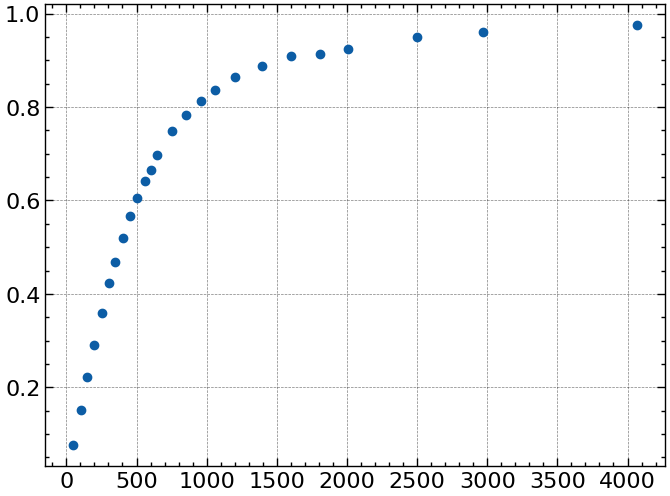

In [90]:
plt.scatter(f[:-6], (V_R/V_0)[:-6])

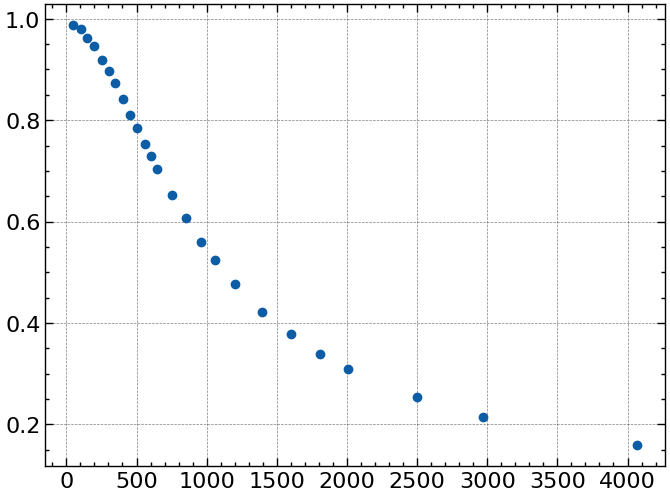

In [91]:
plt.scatter(f[:-6], (V_C/V_0)[:-6])

In [92]:
#circuito RL (Passa-baixa) - 12.7.4

f = np.array([102.43, 150.23, 201.68, 252.6, 301.1, 352.0, 400.8, 452.9, 502.0, 551.3, 600.3, 650.2, 751.6, 851.7, 951.2, 1049.9, 1200.0, 1402.0, 1601.9, 1801.3, 2000.8, 2535.7, 3032, 4009, 5046, 8006, 12003, 15002, 17037, 20000])
f_err = np.array([0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1, 1, 1, 1, 1, 1, 1, 1])

V_0 = np.array([7.54, 7.67, 7.84, 8.03, 8.21, 8.41, 8.61, 8.81, 8.98, 9.15, 9.30, 9.43, 9.68, 9.88, 10.04, 10.17, 10.33, 10.48, 10.59, 10.66, 10.73, 10.83, 10.89, 10.96, 10.99, 11.11, 11.12, 11.12, 11.11, 11.12]) 
#As incertezas para todos os valores de V_0 são a mesma (0,01 V).

V_R = np.array([6.385, 6.293, 6.138, 5.956, 5.783, 5.580, 5.377, 5.156, 4.957, 4.751, 4.559, 4.36, 4.007, 3.71, 3.415, 3.170, 2.853, 2.523, 2.243, 1.996, 1.808, 1.444, 1.207, 0.908, 0.763, 0.4826, 0.3226, 0.257, 0.224, 0.189])
V_R_err = np.array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.01, 0.001, 0.01, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0001, 0.0001, 0.001, 0.001, 0.001])

V_L = np.array([2.092, 2.857, 3.648, 4.362, 5.035, 5.657, 6.180, 6.673, 7.13, 7.50, 7.79, 8.08, 8.62, 8.99, 9.23, 9.46, 9.73, 9.99, 10.24, 10.37, 10.43, 10.61, 10.72, 10.86, 10.96, 11.08, 11.11, 11.12, 11.11, 11.12])
V_L_err = np.array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

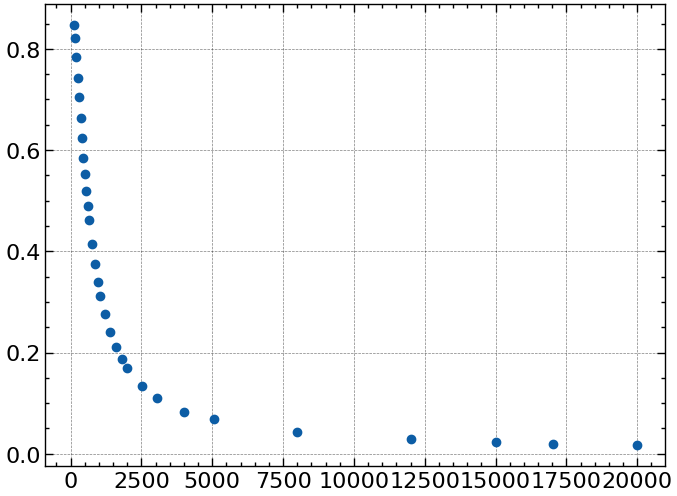

In [93]:
plt.scatter(f, (V_R/V_0))